# Mandelbrot en secuencial

Tiempo (Sin Paralelismo): 8.5250 segundos


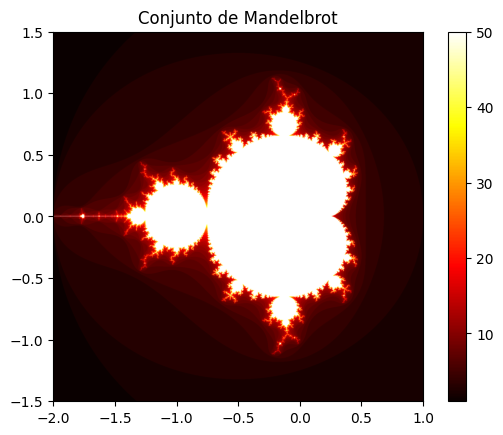

In [7]:
import time
import matplotlib.pyplot as plt
from typing import List

def mandelbrot(c: complex, max_iter: int) -> int:
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def generar_mandelbrot(width: int, height: int, max_iter: int) -> List[List[int]]:
    imagen = [[0 for _ in range(width)] for _ in range(height)]
    for x in range(width):
        for y in range(height):
            # Mapear coordenadas del píxel al plano complejo
            c = complex(-2 + (x / width) * 3, -1.5 + (y / height) * 3)
            imagen[y][x] = mandelbrot(c, max_iter)
    return imagen


width, height = 1500, 1500
max_iter = 50

inicio = time.time()
imagen = generar_mandelbrot(width, height, max_iter)
fin = time.time()

print(f"Tiempo (Sin Paralelismo): {fin - inicio:.4f} segundos")

# Mostrar la imagen en el notebook
plt.imshow(imagen, cmap='hot', extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title('Conjunto de Mandelbrot')
plt.show()


Tiempo (Con Paralelismo): 5.9587 segundos


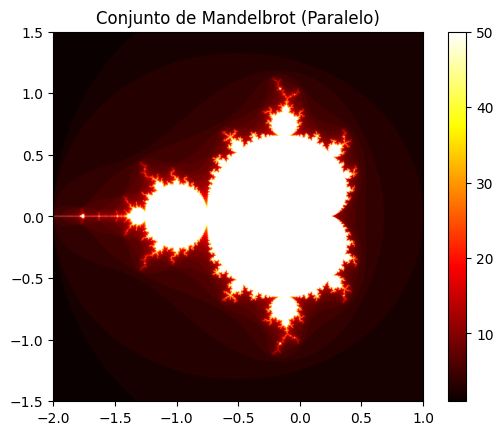

In [8]:
import multiprocessing
import time
import matplotlib.pyplot as plt
from typing import List, Tuple

def generar_mandelbrot_parcial(coordenadas: List[Tuple[int, int]], width: int, height: int, max_iter: int) -> List[int]:
    imagen_parcial = []
    for x, y in coordenadas:
        # Mapear coordenadas del píxel al plano complejo
        c = complex(-2 + (x / width) * 3, -1.5 + (y / height) * 3)
        imagen_parcial.append(mandelbrot(c, max_iter))
    return imagen_parcial

def generar_mandelbrot_paralelo(width: int, height: int, max_iter: int, num_procesos: int) -> List[List[int]]:
    # Crear una lista de coordenadas para cada píxel
    coordenadas = [(x, y) for y in range(height) for x in range(width)]

    # Dividir las coordenadas en partes iguales
    chunk_size = len(coordenadas) // num_procesos
    chunks = [
        coordenadas[i * chunk_size : (i + 1) * chunk_size]
        for i in range(num_procesos)
    ]

    # Crear un pool de procesos
    with multiprocessing.Pool(processes=num_procesos) as pool:
        # Calcular el valor de Mandelbrot para cada coordenada en paralelo
        resultados = pool.starmap(generar_mandelbrot_parcial, [(chunk, width, height, max_iter) for chunk in chunks])

    # Unir los resultados parciales en una sola imagen
    imagen = [pixel for sublist in resultados for pixel in sublist]
    # Convertir la lista en una matriz
    imagen_matriz = [imagen[i * width:(i + 1) * width] for i in range(height)]
    return imagen_matriz


num_procesos = multiprocessing.cpu_count()

inicio = time.time()
imagen = generar_mandelbrot_paralelo(width, height, max_iter, num_procesos)
fin = time.time()

print(f"Tiempo (Con Paralelismo): {fin - inicio:.4f} segundos")

# Mostrar la imagen en el notebook
plt.imshow(imagen, cmap='hot', extent=[-2, 1, -1.5, 1.5])
plt.colorbar()
plt.title('Conjunto de Mandelbrot (Paralelo)')
plt.show()
